In [160]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [161]:
#Generate simple images of random rectangles, image size = 8x8

num_images = 50000

img_size = 8
min_object_size = 1
max_object_size = 4
num_objects = 1

bboxes  = np.zeros((num_images, num_objects, 4))
imgs = np.zeros((num_images, img_size, img_size))  #Create images of size 8x8 and set background to white, 0 = white

for i_img in range(num_images):
    for i_object in range(num_objects):
        w, h = np.random.randint(min_object_size, max_object_size, size = 2)
        x = np.random.randint(0, img_size - w)
        y = np.random.randint(0, img_size - h)
        imgs[i_img, x:x+w, y:y+h] = 1  #Set the random rectangles in white background to black, 1 = black
        bboxes[i_img, i_object] = [x, y, w, h]

imgs.shape, bboxes.shape

((50000, 8, 8), (50000, 1, 4))

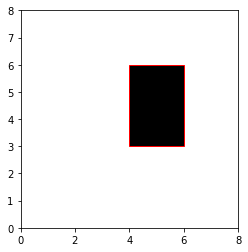

In [162]:
i = np.random.randint(0, num_images)
plt.imshow(imgs[i].T, cmap='Greys', interpolation='none', origin='lower', extent=[0, img_size, 0, img_size])
for bbox in bboxes[i]:
    plt.gca().add_patch(matplotlib.patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], ec='r', fc='none'))

In [163]:
#Reshape and normalize the immages data to mean 0 and std 1
X = (imgs.reshape(num_images, -1) - np.mean(imgs)) / np.std(imgs)
X.shape, np.mean(X), np.std(X)

((50000, 64), 5.32018873400375e-17, 0.9999999999999994)

In [164]:
#Normalize x, y, w, h by img_size, so that all values are between 0 and 1
#Important: Do not shift to negative values (e.g. by settig to mean 0), because IOU calulations needs positive w and h.
y = bboxes.reshape(num_images, -1) / img_size
y.shape, np.mean(y), np.std(y)

((50000, 4), 0.28100375, 0.17525254630371992)

In [165]:
#Split training and test images
i = int(0.8 * num_images)
train_X = X[:i]
test_X = X[i:]
train_y = y[:i]
test_y = y[i:]
test_imgs = imgs[i:]
test_bboxes = bboxes[i:]

In [166]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable

In [167]:
class Net(nn.Module):
    def __init__(self, X, y):
        super(Net, self).__init__()
        self.hidden = nn.Linear(X.shape[-1], 200)
        self.out = nn.Linear(200, y.shape[-1])

    def forward(self, X):
        X = F.relu(self.hidden(X))
        X = F.dropout(X, 0.2)
        X = self.out(X)
        return X

model = Net(X, y)
print(model)

Net(
  (hidden): Linear(in_features=64, out_features=200, bias=True)
  (out): Linear(in_features=200, out_features=4, bias=True)
)


In [168]:
train_X_Tensor = torch.from_numpy(train_X)
train_X_Tensor = Variable(train_X_Tensor)
loss_fn = torch.nn.MSELoss(size_average = False)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

In [169]:
y = torch.from_numpy(y).float()

In [170]:
for t in range(700):
    y_pred = model(train_X_Tensor.float())
    loss = loss_fn(y_pred, torch.FloatTensor(y[:40000]))
    print(t, loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

0 19451.888671875
1 13783.904296875
2 9706.1484375
3 7100.623046875
4 5729.0078125
5 5221.8994140625
6 5146.74462890625
7 5145.0
8 5006.81689453125
9 4680.71826171875
10 4216.19677734375
11 3701.800048828125
12 3224.92431640625
13 2844.6708984375
14 2584.987060546875
15 2436.310791015625
16 2366.03857421875
17 2333.34912109375
18 2300.9599609375
19 2244.081298828125
20 2152.694580078125
21 2030.1865234375
22 1890.1312255859375
23 1749.1453857421875
24 1621.7314453125
25 1517.5452880859375
26 1439.2952880859375
27 1382.8580322265625
28 1340.416748046875
29 1302.934326171875
30 1263.151123046875
31 1216.2294921875
32 1162.131103515625
33 1103.400634765625
34 1044.655517578125
35 990.362060546875
36 943.8263549804688
37 905.9513549804688
38 875.1822509765625
39 848.8253173828125
40 823.3796997070312
41 796.5728149414062
42 767.2457885742188
43 735.641845703125
44 703.7217407226562
45 673.4066772460938
46 646.6119995117188
47 624.172607421875
48 605.7316284179688
49 590.00244140625
50 575.

376 4.7583794593811035
377 4.705137252807617
378 4.652586936950684
379 4.600863456726074
380 4.549355983734131
381 4.498561382293701
382 4.4481377601623535
383 4.398382186889648
384 4.349400520324707
385 4.301016807556152
386 4.253351211547852
387 4.2060956954956055
388 4.15971040725708
389 4.113541603088379
390 4.0680975914001465
391 4.023070335388184
392 3.9783501625061035
393 3.934429883956909
394 3.8909077644348145
395 3.847884178161621
396 3.8052568435668945
397 3.763423442840576
398 3.721766233444214
399 3.680584192276001
400 3.6401357650756836
401 3.599792718887329
402 3.5602264404296875
403 3.52078914642334
404 3.482120990753174
405 3.4435019493103027
406 3.40588116645813
407 3.3681728839874268
408 3.3312034606933594
409 3.2945241928100586
410 3.258335828781128
411 3.2223494052886963
412 3.186903238296509
413 3.1516764163970947
414 3.1169958114624023
415 3.0826878547668457
416 3.0487687587738037
417 3.015061855316162
418 2.9818756580352783
419 2.9489715099334717
420 2.916449308

In [178]:
test_X_Tensor = torch.from_numpy(test_X)
test_X_Tensor = Variable(test_X_Tensor)
pred_Y = model(test_X_Tensor.float())
pred_Y = pred_Y.detach().numpy()
pred_bboxes = pred_Y * img_size
pred_bboxes = pred_bboxes.reshape(len(pred_bboxes), num_objects, -1)
pred_bboxes.shape

(10000, 1, 4)

In [179]:
def IOU(bbox1, bbox2):
    '''Calculate overlap between two bounding boxes [x, y, w, h] as the area of intersection over area of union'''
    x1, y1, w1, h1 = bbox1[0], bbox1[1], bbox1[2], bbox1[3]
    x2, y2, w2, h2 = bbox2[0], bbox2[1], bbox2[2], bbox2[3]
    
    w_I = min(x1 + w1, x2 + w2) - max(x1, x2)
    h_I = min(y1 + h1, y2 + h2) - max(y1, y2)
    if w_I <= 0 or h_I <= 0:   #No Overlap
        return 0
    I = w_I * h_I
    
    U = w1 * h1 + w2 * h2 - I

    return I / U

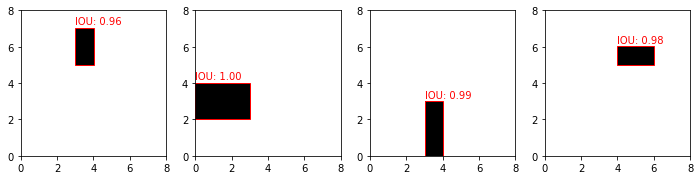

In [180]:
#Show a few images and predicted bounding boxes from the test dataset. 
plt.figure(figsize=(12, 3))
for i_subplot in range(1, 5):
    plt.subplot(1, 4, i_subplot)
    i = np.random.randint(len(test_imgs))
    plt.imshow(test_imgs[i].T, cmap ='Greys', interpolation ='none', origin ='lower', extent = [0, img_size, 0, img_size])
    for pred_bbox, exp_bbox in zip(pred_bboxes[i], test_bboxes[i]):
        plt.gca().add_patch(matplotlib.patches.Rectangle((pred_bbox[0], pred_bbox[1]), pred_bbox[2], pred_bbox[3], ec = 'r', fc = 'none'))
        plt.annotate('IOU: {:.2f}'.format(IOU(pred_bbox, exp_bbox)), (pred_bbox[0], pred_bbox[1] + pred_bbox[3] + 0.2), color = 'r')
        
#plt.savefig('plots/bw-single-rectangle_prediction.png', dpi=300)

In [181]:
#Calculate the mean IOU (overlap) between the predicted and expected bounding boxes on the test dataset. 
summed_IOU = 0.
for pred_bbox, test_bbox in zip(pred_bboxes.reshape(-1, 4), test_bboxes.reshape(-1, 4)):
    summed_IOU += IOU(pred_bbox, test_bbox)
mean_IOU = summed_IOU / len(pred_bboxes)
mean_IOU

0.9858812934320438